# Toy Problem 1

In [1]:
#necessary imports

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern

### Helper Functions

In [2]:
def plot_data(x, y, x_agg, y_agg, x_test, y_pred=None, aleatoric_uncertainty=None, epistemic_uncertainty=None, total_uncertainty=None, title=None):
    if y_pred is not None:
        
        df = pd.DataFrame({'x': x, 'y': y})

        fig, ax = plt.subplots(3,1, figsize=(10, 5.5), dpi=300, sharex=True, gridspec_kw={'height_ratios': [2, 1.5, 1.5]})
        fig.suptitle(title, fontsize=12)
        
        #subspaces
        ax[0].fill_betweenx([0,1.2], 0, 10, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1.2], 10, 20, color='grey', alpha=0.2)
        ax[0].fill_betweenx([0,1.2], 20, 30, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1.2], 30, 40, color='grey', alpha=0.2)
        ax[0].fill_betweenx([0,1.2], 40, 50, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1.2], 50, 60, color='grey', alpha=0.2)
        ax[0].fill_betweenx([0,1.2], 60, 70, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1.2], 70, 80, color='grey', alpha=0.2)
        ax[0].fill_betweenx([0,1.2], 80, 90, color='grey', alpha=0.1)
        ax[0].fill_betweenx([0,1.2], 90, 100, color='grey', alpha=0.2)

        #ground truth
        ax[0].plot(np.arange(10,21,1), [0.7]*11, color='blue', label='ground truth', linewidth=1.5)
        ax[0].plot(np.arange(20,31,1), [0.75]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(30,41,1), [0.85]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(40,51,1), [0.6]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(50,61,1), [0.8]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(60,71,1), [0.9]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(70,81,1), [0.85]*11, color='blue', linewidth=1.5)
        ax[0].plot(np.arange(80,91,1), [0.85]*11, color='blue', linewidth=1.5)

        ax[0].fill_between(np.arange(10,21,1), [0.7-1.96*np.sqrt(0.0001)]*11, [0.7+1.96*np.sqrt(0.0001)]*11, color='blue', alpha=0.2, label='95% PI - ground truth')
        ax[0].fill_between(np.arange(20,31,1), [0.75-1.96*np.sqrt(0.0009)]*11, [0.75+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(30,41,1), [0.85-1.96*np.sqrt(0.0009)]*11, [0.85+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(40,51,1), [0.6-1.96*np.sqrt(0.0064)]*11, [0.6+1.96*np.sqrt(0.0064)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(50,61,1), [0.8-1.96*np.sqrt(0.0036)]*11, [0.8+1.96*np.sqrt(0.0036)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(60,71,1), [0.9-1.96*np.sqrt(0.0016)]*11, [0.9+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(70,81,1), [0.85-1.96*np.sqrt(0.0016)]*11, [0.85+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
        ax[0].fill_between(np.arange(80,91,1), [0.85-1.96*np.sqrt(0.0004)]*11, [0.85+1.96*np.sqrt(0.0004)]*11, color='blue', alpha=0.2)

        #observations
        ax[0].scatter([],[], color='black', label='observations')
        sns.boxplot(x='x', y='y', data=df, fliersize=0.1,native_scale=True, ax=ax[0], linewidth=1.5, label='observed distribution')
        sns.stripplot(x='x', y='y', data=df, color='black', jitter=True, alpha=0.5, size=2, native_scale=True, ax=ax[0], linewidth=1.5)

        #predictions
        ax[0].plot(x_test, y_pred, color='red', label='prediction', linewidth=1.5)
        ax[0].fill_between(x_test, y_pred - 1.96 * np.sqrt(total_uncertainty), y_pred + 1.96 * np.sqrt(total_uncertainty), color='red', alpha=0.2, label='95% PI - total predicted uncertainty')

        ax[0].set_ylabel('acc')
        ax[0].set_ylim([0,1])
        ax[0].yaxis.grid(True)

        ax[0].legend(loc='lower right')

        #subspaces
        ax[1].fill_betweenx([0,0.018], 0, 10, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 10, 20, color='grey', alpha=0.2)
        ax[1].fill_betweenx([0,0.018], 20, 30, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 30, 40, color='grey', alpha=0.2)
        ax[1].fill_betweenx([0,0.018], 40, 50, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 50, 60, color='grey', alpha=0.2)
        ax[1].fill_betweenx([0,0.018], 60, 70, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 70, 80, color='grey', alpha=0.2)
        ax[1].fill_betweenx([0,0.018], 80, 90, color='grey', alpha=0.1)
        ax[1].fill_betweenx([0,0.018], 90, 100, color='grey', alpha=0.2)

        #ground truth
        ax[1].plot(np.arange(10,21,1), [0.0001]*11, color='darkcyan', label='ground truth', linewidth=1.5)
        ax[1].plot(np.arange(20,31,1), [0.0009]*11, color='darkcyan', linewidth=1.5)
        ax[1].plot(np.arange(30,41,1), [0.0009]*11, color='darkcyan', linewidth=1.5)
        ax[1].plot(np.arange(40,51,1), [0.0064]*11, color='darkcyan', linewidth=1.5)
        ax[1].plot(np.arange(50,61,1), [0.0036]*11, color='darkcyan', linewidth=1.5)
        ax[1].plot(np.arange(60,71,1), [0.0016]*11, color='darkcyan', linewidth=1.5)
        ax[1].plot(np.arange(70,81,1), [0.0016]*11, color='darkcyan', linewidth=1.5)
        ax[1].plot(np.arange(80,91,1), [0.0004]*11, color='darkcyan', linewidth=1.5)


        #observations
        ax[1].bar(x_agg, y_agg[:,1], color='black', label='observation')

        #predictions
        ax[1].plot(x_test, aleatoric_uncertainty, color='orange', label='prediction', linewidth=1.5)
        
        
        ax[1].set_ylabel('var')
        ax[1].set_ylim([0,0.018])
        ax[1].yaxis.grid(True)

        ax[1].legend(loc='upper right')

        #subspaces
        ax[2].fill_betweenx([0,0.018], 0, 10, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 10, 20, color='grey', alpha=0.2)
        ax[2].fill_betweenx([0,0.018], 20, 30, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 30, 40, color='grey', alpha=0.2)
        ax[2].fill_betweenx([0,0.018], 40, 50, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 50, 60, color='grey', alpha=0.2)
        ax[2].fill_betweenx([0,0.018], 60, 70, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 70, 80, color='grey', alpha=0.2)
        ax[2].fill_betweenx([0,0.018], 80, 90, color='grey', alpha=0.1)
        ax[2].fill_betweenx([0,0.018], 90, 100, color='grey', alpha=0.2)

        #predictions
        ax[2].plot(x_test, epistemic_uncertainty, color='green', label='prediction', linewidth=1.5)
        
        ax[2].set_ylabel('var')
        ax[2].set_ylim([0,0.018])
        ax[2].yaxis.grid(True)

        ax[2].legend(loc='upper right')

        #subplot to zoom in on a specific region of the plot
        # if title == 'CatBoost':
        #     # inset Axes....
        #     x1, x2, y1, y2 = 35, 55, 0, 1e-5  # subregion of the original image
        #     axins = ax[2].inset_axes(
        #         [0.2, 0.2, 0.5, 0.5],
        #         xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
        #     axins.plot(x_test[35:55], epistemic_uncertainty[35:55], color='green', label='Epistemic', linewidth=2)
        #     axins.set_ylim([0,1e-4])
        #     axins.set_yticks([0, 5e-5, 1e-4])
        #     axins.set_yticklabels(['0', '5e-5', '1e-4'])

        #     ax[2].indicate_inset_zoom(axins, edgecolor="black")

        ax[2].set_xlabel('meta-feature 1')
        ax[2].set_xlim([np.min(x_test), np.max(x_test)])

        ax[2].set_xticks(np.arange(np.min(x_test),np.max(x_test),10))

        #plt.savefig(f"toy1_{title}.pdf", format="pdf", bbox_inches="tight")
        

    else:
        df = pd.DataFrame({'x': x, 'y': y})

        fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
        fig.suptitle('Problem setup', fontsize=12)

        #subspaces
        ax.fill_betweenx([0,1], 0, 10, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 10, 20, color='grey', alpha=0.2)
        ax.fill_betweenx([0,1], 20, 30, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 30, 40, color='grey', alpha=0.2)
        ax.fill_betweenx([0,1], 40, 50, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 50, 60, color='grey', alpha=0.2)
        ax.fill_betweenx([0,1], 60, 70, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 70, 80, color='grey', alpha=0.2)
        ax.fill_betweenx([0,1], 80, 90, color='grey', alpha=0.1)
        ax.fill_betweenx([0,1], 90, 100, color='grey', alpha=0.2)

        #ground truth
        ax.plot(np.arange(10,21,1), [0.7]*11, color='blue', label='ground truth', linewidth=1.5)
        ax.plot(np.arange(20,31,1), [0.75]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(30,41,1), [0.85]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(40,51,1), [0.6]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(50,61,1), [0.8]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(60,71,1), [0.9]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(70,81,1), [0.85]*11, color='blue', linewidth=1.5)
        ax.plot(np.arange(80,91,1), [0.85]*11, color='blue', linewidth=1.5)

        ax.fill_between(np.arange(10,21,1), [0.7-1.96*np.sqrt(0.0001)]*11, [0.7+1.96*np.sqrt(0.0001)]*11, color='blue', alpha=0.2, label='95% PI - ground truth')
        ax.fill_between(np.arange(20,31,1), [0.75-1.96*np.sqrt(0.0009)]*11, [0.75+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(30,41,1), [0.85-1.96*np.sqrt(0.0009)]*11, [0.85+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(40,51,1), [0.6-1.96*np.sqrt(0.0064)]*11, [0.6+1.96*np.sqrt(0.0064)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(50,61,1), [0.8-1.96*np.sqrt(0.0036)]*11, [0.8+1.96*np.sqrt(0.0036)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(60,71,1), [0.9-1.96*np.sqrt(0.0016)]*11, [0.9+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(70,81,1), [0.85-1.96*np.sqrt(0.0016)]*11, [0.85+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
        ax.fill_between(np.arange(80,91,1), [0.85-1.96*np.sqrt(0.0004)]*11, [0.85+1.96*np.sqrt(0.0004)]*11, color='blue', alpha=0.2)
        
        #observations
        ax.scatter([],[], color='black', label='observations')
        sns.boxplot(x='x', y='y', data=df, fliersize=0.1,native_scale=True, ax=ax, label='observed distribution')
        sns.stripplot(x='x', y='y', data=df, color='black', alpha=0.5, size=2, native_scale=True, ax=ax)

        ax.set_xlabel('meta-feature 1', fontsize=12)
        ax.set_ylabel('acc', fontsize=12)

        ax.set_xlim([np.min(x_test), np.max(x_test)])
        ax.set_ylim([0,1])

        ax.set_xticks(np.arange(np.min(x_test),np.max(x_test)+1,10))
        ax.yaxis.grid(True)

        ax.legend(loc='lower right')

        #plt.savefig("general_setup.pdf", format="pdf", bbox_inches="tight")

    plt.tight_layout

    plt.show()

In [3]:
def plot_all(x, y, x_agg, y_agg, x_test, 
             y_pred_rf=None, aleatoric_uncertainty_rf=None, epistemic_uncertainty_rf=None, total_uncertainty_rf=None,
             y_pred_cb=None, aleatoric_uncertainty_cb=None, epistemic_uncertainty_cb=None, total_uncertainty_cb=None, 
             y_pred_gpr=None, aleatoric_uncertainty_gpr=None, epistemic_uncertainty_gpr=None, total_uncertainty_gpr=None):
    
    if y_pred_gpr is not None:
        df = pd.DataFrame({'x': x, 'y': y})

        fig, ax = plt.subplots(3,3, figsize=(10, 5.5),dpi=300, sharex=True, gridspec_kw={'height_ratios': [1.5, 1, 1]})

        for i in range(3):
            
            #subspaces
            ax[0,i].fill_betweenx([0,1.2], 0, 10, color='grey', alpha=0.1)
            ax[0,i].fill_betweenx([0,1.2], 10, 20, color='grey', alpha=0.2)
            ax[0,i].fill_betweenx([0,1.2], 20, 30, color='grey', alpha=0.1)
            ax[0,i].fill_betweenx([0,1.2], 30, 40, color='grey', alpha=0.2)
            ax[0,i].fill_betweenx([0,1.2], 40, 50, color='grey', alpha=0.1)
            ax[0,i].fill_betweenx([0,1.2], 50, 60, color='grey', alpha=0.2)
            ax[0,i].fill_betweenx([0,1.2], 60, 70, color='grey', alpha=0.1)
            ax[0,i].fill_betweenx([0,1.2], 70, 80, color='grey', alpha=0.2)
            ax[0,i].fill_betweenx([0,1.2], 80, 90, color='grey', alpha=0.1)
            ax[0,i].fill_betweenx([0,1.2], 90, 100, color='grey', alpha=0.2)

            #ground truth
        
            ax[0,i].plot(np.arange(10,21,1), [0.7]*11, color='blue', linewidth=1.5)
            ax[0,i].plot(np.arange(20,31,1), [0.75]*11, color='blue', linewidth=1.5)
            ax[0,i].plot(np.arange(30,41,1), [0.85]*11, color='blue', linewidth=1.5)
            ax[0,i].plot(np.arange(40,51,1), [0.6]*11, color='blue', linewidth=1.5)
            ax[0,i].plot(np.arange(50,61,1), [0.8]*11, color='blue', linewidth=1.5)
            ax[0,i].plot(np.arange(60,71,1), [0.9]*11, color='blue', linewidth=1.5)
            ax[0,i].plot(np.arange(70,81,1), [0.85]*11, color='blue', linewidth=1.5)
            ax[0,i].plot(np.arange(80,91,1), [0.85]*11, color='blue', linewidth=1.5)

            ax[0,i].fill_between(np.arange(10,21,1), [0.7-1.96*np.sqrt(0.0001)]*11, [0.7+1.96*np.sqrt(0.0001)]*11, color='blue', alpha=0.2)
            ax[0,i].fill_between(np.arange(20,31,1), [0.75-1.96*np.sqrt(0.0009)]*11, [0.75+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
            ax[0,i].fill_between(np.arange(30,41,1), [0.85-1.96*np.sqrt(0.0009)]*11, [0.85+1.96*np.sqrt(0.0009)]*11, color='blue', alpha=0.2)
            ax[0,i].fill_between(np.arange(40,51,1), [0.6-1.96*np.sqrt(0.0064)]*11, [0.6+1.96*np.sqrt(0.0064)]*11, color='blue', alpha=0.2)
            ax[0,i].fill_between(np.arange(50,61,1), [0.8-1.96*np.sqrt(0.0036)]*11, [0.8+1.96*np.sqrt(0.0036)]*11, color='blue', alpha=0.2)
            ax[0,i].fill_between(np.arange(60,71,1), [0.9-1.96*np.sqrt(0.0016)]*11, [0.9+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
            ax[0,i].fill_between(np.arange(70,81,1), [0.85-1.96*np.sqrt(0.0016)]*11, [0.85+1.96*np.sqrt(0.0016)]*11, color='blue', alpha=0.2)
            ax[0,i].fill_between(np.arange(80,91,1), [0.85-1.96*np.sqrt(0.0004)]*11, [0.85+1.96*np.sqrt(0.0004)]*11, color='blue', alpha=0.2)

            #observations
            sns.boxplot(x='x', y='y', data=df, fliersize=0.1,native_scale=True, ax=ax[0,i], linewidth=1.5)
            sns.stripplot(x='x', y='y', data=df, color='black', jitter=True, alpha=0.5, size=2, native_scale=True, ax=ax[0,i], linewidth=1.5)
          
        #labels for legend
        ax[0,2].plot([], [], color='blue', label='ground truth', linewidth=1.5)
        ax[0,2].fill_between([],[], [], color='blue', alpha=0.2, label='95% PI - ground truth')
        ax[0,2].scatter([],[], color='black', label='observations')
        ax[0,2].fill_between([], [], [], color='steelblue', label='observed distribution', linewidth=1.5)
        
        #predictions
        ax[0,0].plot(x_test, y_pred_rf, color='red', linewidth=1.5)
        ax[0,0].fill_between(x_test, y_pred_rf - 1.96 * np.sqrt(total_uncertainty_rf), y_pred_rf + 1.96 * np.sqrt(total_uncertainty_rf), color='red', alpha=0.2)

        ax[0,1].plot(x_test, y_pred_cb, color='red', linewidth=1.5)
        ax[0,1].fill_between(x_test, y_pred_cb - 1.96 * np.sqrt(total_uncertainty_cb), y_pred_gpr + 1.96 * np.sqrt(total_uncertainty_cb), color='red', alpha=0.2)

        ax[0,2].plot(x_test, y_pred_gpr, color='red', label='prediction', linewidth=1.5)
        ax[0,2].fill_between(x_test, y_pred_gpr - 1.96 * np.sqrt(total_uncertainty_gpr), y_pred_gpr + 1.96 * np.sqrt(total_uncertainty_gpr), color='red', alpha=0.2, label='95% PI - total predicted uncertainty')

        ax[0,0].set_ylabel('acc', fontsize=12)
        ax[0,1].set(ylabel=None)
        ax[0,2].set(ylabel=None)
        ax[0,0].set_ylim([0,1])
        ax[0,1].set_ylim([0,1])
        ax[0,2].set_ylim([0,1])
        ax[0,0].yaxis.grid(True)
        ax[0,1].yaxis.grid(True)
        ax[0,2].yaxis.grid(True)
        ax[0,1].tick_params('y', left=False, labelleft=False)
        ax[0,2].tick_params('y', left=False, labelleft=False)

        #labels for legend
        ax[0,2].plot([],[], color='darkcyan', label='ground truth aleatoric',linewidth=1.5)
        ax[0,2].scatter([], [], color='black', label='observation aleatoric', linewidth=1.5, marker='s')
        ax[0,2].plot([], [], color='orange', label='prediction aleatoric', linewidth=1.5)
        ax[0,2].plot([], [], color='green', label='prediction epistemic', linewidth=1.5)

        for i in range(3):
            #subspaces

            ax[1,i].fill_betweenx([0,0.018], 0, 10, color='grey', alpha=0.1)
            ax[1,i].fill_betweenx([0,0.018], 10, 20, color='grey', alpha=0.2)
            ax[1,i].fill_betweenx([0,0.018], 20, 30, color='grey', alpha=0.1)
            ax[1,i].fill_betweenx([0,0.018], 30, 40, color='grey', alpha=0.2)
            ax[1,i].fill_betweenx([0,0.018], 40, 50, color='grey', alpha=0.1)
            ax[1,i].fill_betweenx([0,0.018], 50, 60, color='grey', alpha=0.2)
            ax[1,i].fill_betweenx([0,0.018], 60, 70, color='grey', alpha=0.1)
            ax[1,i].fill_betweenx([0,0.018], 70, 80, color='grey', alpha=0.2)
            ax[1,i].fill_betweenx([0,0.018], 80, 90, color='grey', alpha=0.1)
            ax[1,i].fill_betweenx([0,0.018], 90, 100, color='grey', alpha=0.2)

            #ground truth

            ax[1,i].plot(np.arange(10,21,1), [0.0001]*11, color='darkcyan', linewidth=1.5)
            ax[1,i].plot(np.arange(20,31,1), [0.0009]*11, color='darkcyan', linewidth=1.5)
            ax[1,i].plot(np.arange(30,41,1), [0.0009]*11, color='darkcyan', linewidth=1.5)
            ax[1,i].plot(np.arange(40,51,1), [0.0064]*11, color='darkcyan', linewidth=1.5)
            ax[1,i].plot(np.arange(50,61,1), [0.0036]*11, color='darkcyan', linewidth=1.5)
            ax[1,i].plot(np.arange(60,71,1), [0.0016]*11, color='darkcyan', linewidth=1.5)
            ax[1,i].plot(np.arange(70,81,1), [0.0016]*11, color='darkcyan', linewidth=1.5)
            ax[1,i].plot(np.arange(80,91,1), [0.0004]*11, color='darkcyan', linewidth=1.5)


            #observations
            ax[1,i].bar(x_agg, y_agg[:,1], color='black', label='observation', linewidth=1.5)

        #predictions
        ax[1,0].plot(x_test, aleatoric_uncertainty_rf, color='orange', label='prediction', linewidth=1.5)
        ax[1,1].plot(x_test, aleatoric_uncertainty_cb, color='orange', label='prediction', linewidth=1.5)
        ax[1,2].plot(x_test, aleatoric_uncertainty_gpr, color='orange', label='prediction', linewidth=1.5)
        
        ax[1,0].set_ylabel('var', fontsize=12)
        ax[1,1].set(ylabel=None)
        ax[1,2].set(ylabel=None)
        ax[1,0].set_ylim([0,0.018])
        ax[1,1].set_ylim([0,0.018])
        ax[1,2].set_ylim([0,0.018])
        ax[1,0].yaxis.grid(True)
        ax[1,1].yaxis.grid(True)
        ax[1,2].yaxis.grid(True)
        ax[1,1].tick_params('y', left=False, labelleft=False)
        ax[1,2].tick_params('y', left=False, labelleft=False)

        for i in range(3):

            #subspaces
            ax[2,i].fill_betweenx([0,0.018], 0, 10, color='grey', alpha=0.1)
            ax[2,i].fill_betweenx([0,0.018], 10, 20, color='grey', alpha=0.2)
            ax[2,i].fill_betweenx([0,0.018], 20, 30, color='grey', alpha=0.1)
            ax[2,i].fill_betweenx([0,0.018], 30, 40, color='grey', alpha=0.2)
            ax[2,i].fill_betweenx([0,0.018], 40, 50, color='grey', alpha=0.1)
            ax[2,i].fill_betweenx([0,0.018], 50, 60, color='grey', alpha=0.2)
            ax[2,i].fill_betweenx([0,0.018], 60, 70, color='grey', alpha=0.1)
            ax[2,i].fill_betweenx([0,0.018], 70, 80, color='grey', alpha=0.2)
            ax[2,i].fill_betweenx([0,0.018], 80, 90, color='grey', alpha=0.1)
            ax[2,i].fill_betweenx([0,0.018], 90, 100, color='grey', alpha=0.2)

        ax[2,0].plot(x_test, epistemic_uncertainty_rf, color='green', label='prediction', linewidth=1.5)
        ax[2,1].plot(x_test, epistemic_uncertainty_cb, color='green', label='prediction', linewidth=1.5)
        ax[2,2].plot(x_test, epistemic_uncertainty_gpr, color='green', label='prediction', linewidth=1.5)
        
        ax[2,0].set_ylabel('var', fontsize=12)
        ax[2,1].set(ylabel=None)
        ax[2,2].set(ylabel=None)
        ax[2,0].set_ylim([0,0.018])
        ax[2,1].set_ylim([0,0.018])
        ax[2,2].set_ylim([0,0.018])
        ax[2,0].yaxis.grid(True)
        ax[2,1].yaxis.grid(True)
        ax[2,2].yaxis.grid(True)
        ax[2,1].tick_params('y', left=False, labelleft=False)
        ax[2,2].tick_params('y', left=False, labelleft=False)

        #zoom in on a specific region of the plot
        x1, x2, y1, y2 = 35, 55, 0, 1e-5  # subregion of the original image
        axins = ax[2,1].inset_axes(
             [0.2, 0.2, 0.5, 0.5],
                 xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
        axins.plot(x_test[35:55], epistemic_uncertainty_cb[35:55], color='green', label='Epistemic', linewidth=2)
        axins.set_ylim([0,1e-4])
        axins.set_yticks([0, 5e-5, 1e-4])
        axins.set_yticklabels(['0', '5e-5', '1e-4'])
        axins.fill_betweenx([0,1e-4], 35, 40, color='grey', alpha=0.2)
        axins.fill_betweenx([0,1e-4], 40, 50, color='grey', alpha=0.1)
        axins.fill_betweenx([0,1e-4], 50, 55, color='grey', alpha=0.2)
        ax[2,1].indicate_inset_zoom(axins, edgecolor="black")

        ax[2,0].set_xlabel('meta-feature 1')
        ax[2,1].set_xlabel('meta-feature 1')
        ax[2,2].set_xlabel('meta-feature 1')
        ax[2,0].set_xlim([np.min(x_test), np.max(x_test)])
        ax[2,1].set_xlim([np.min(x_test), np.max(x_test)])
        ax[2,2].set_xlim([np.min(x_test), np.max(x_test)])

        ax[2,0].set_xticks(np.arange(np.min(x_test),np.max(x_test)+1,10))
        ax[2,1].set_xticks(np.arange(np.min(x_test),np.max(x_test)+1,10))
        ax[2,2].set_xticks(np.arange(np.min(x_test),np.max(x_test)+1,10))

        ax[0,0].set_title('total uncertainty', fontsize=12, loc='left')
        ax[1,0].set_title('aleatoric uncertainty', fontsize=12, loc='left')
        ax[2,0].set_title('epistemic uncertainty', fontsize=12, loc='left')    
    
        handles, labels = ax[0, 2].get_legend_handles_labels()  
        fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15)) 

        ax[0,0].annotate('RF', xy=(0.47, 1.2), xycoords='axes fraction', fontsize=12)
        ax[0,1].annotate('vSGLB', xy=(0.4, 1.2), xycoords='axes fraction', fontsize=12)
        ax[0,2].annotate('GPR', xy=(0.43, 1.2), xycoords='axes fraction', fontsize=12)

    #plt.savefig("toy1_all.pdf", format="pdf", bbox_inches="tight")

    plt.tight_layout()
    plt.show()

## Data generation

In [4]:
#data generation

num_samples = 30
num_data_points = 20

rng = np.random.default_rng(seed=42)

rand = rng.choice(np.arange(10,91,1), num_data_points, replace=False)
x_agg = np.sort(rand)
x = np.repeat(x_agg, num_samples)

x_test_qual = np.linspace(0,100,100)

y_all = np.empty((num_data_points,num_samples))

for i in range(num_data_points):
    if x_agg[i] < 20 and x_agg[i] >= 10:
        y_all[i] = np.clip(np.random.normal(0.7, 0.01, num_samples), 0,1)
    elif x_agg[i] < 30 and x_agg[i] >= 20:
        y_all[i] = np.clip(np.random.normal(0.75, 0.03, num_samples), 0,1)
    elif x_agg[i] < 40 and x_agg[i] >= 30:
        y_all[i] = np.clip(np.random.normal(0.85, 0.03, num_samples), 0,1)
    elif x_agg[i] < 50 and x_agg[i] >= 40:
        y_all[i] = np.clip(np.random.normal(0.6, 0.08, num_samples), 0,1)
    elif x_agg[i] < 60 and x_agg[i] >= 50:
        y_all[i] = np.clip(np.random.normal(0.8, 0.06, num_samples), 0,1)
    elif x_agg[i] < 70 and x_agg[i] >= 60:
        y_all[i] = np.clip(np.random.normal(0.9, 0.04, num_samples), 0,1)
    elif x_agg[i] < 80 and x_agg[i] >= 70:
        y_all[i] = np.clip(np.random.normal(0.85, 0.04, num_samples), 0,1)
    else:
        y_all[i] = np.clip(np.random.normal(0.85, 0.02, num_samples), 0,1)

y = y_all.flatten()
y_agg = np.array([np.mean(y_all, axis=1), np.var(y_all, ddof=1, axis=1)]).T

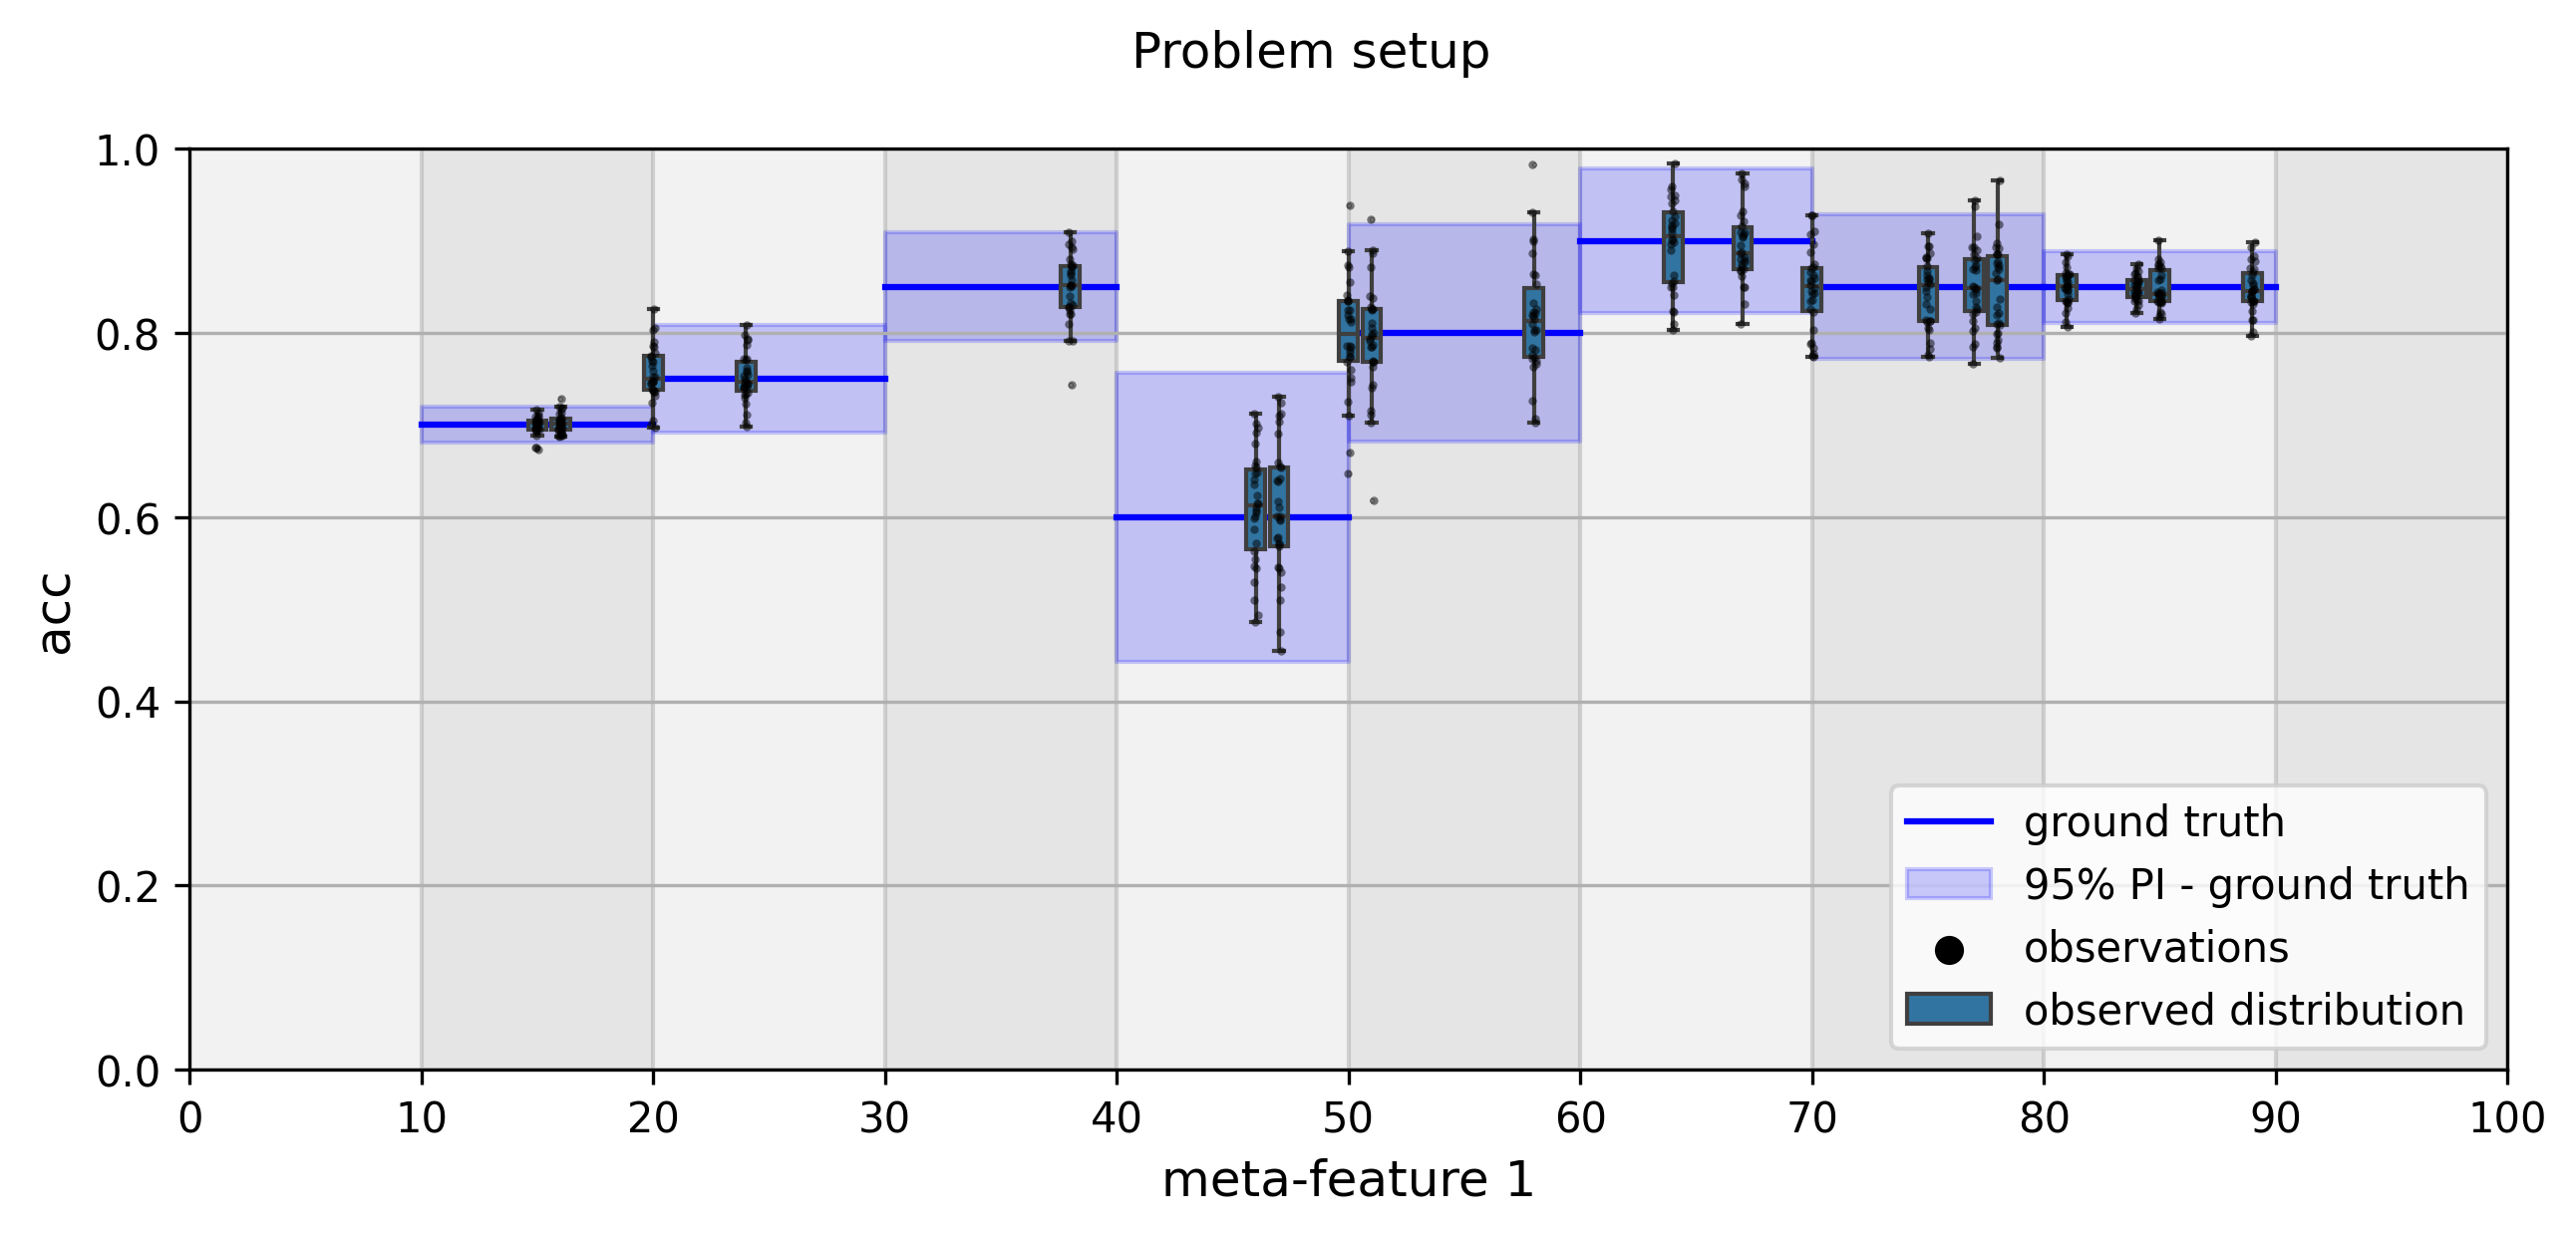

In [5]:
plot_data(x, y, x_agg, y_agg, x_test_qual)

## RF on aggregated mean and variance

In [6]:
#model and training
rf = RandomForestRegressor(random_state=0)
rf.fit(x_agg.reshape(-1,1), y_agg)

#predictions to calculate uncertainties
y_pred_mean_rf_help = np.empty([rf.n_estimators, x_test_qual.shape[0]])
y_pred_var_rf_help = np.empty([rf.n_estimators, x_test_qual.shape[0]])
for i in range(rf.n_estimators):
    y_pred_rf_help = rf.estimators_[i].predict(x_test_qual.reshape(-1,1))
    y_pred_mean_rf_help[i] = y_pred_rf_help[:,0]
    y_pred_var_rf_help[i] = y_pred_rf_help[:,1]

#mean prediction
y_pred_mean_rf = np.mean(y_pred_mean_rf_help, axis=0)

#uncertainties (var)
aleatoric_uncertainty_rf = np.mean(y_pred_var_rf_help, axis=0)
epistemic_uncertainty_rf = np.var(y_pred_mean_rf_help, axis=0)
total_uncertainty_rf = aleatoric_uncertainty_rf + epistemic_uncertainty_rf

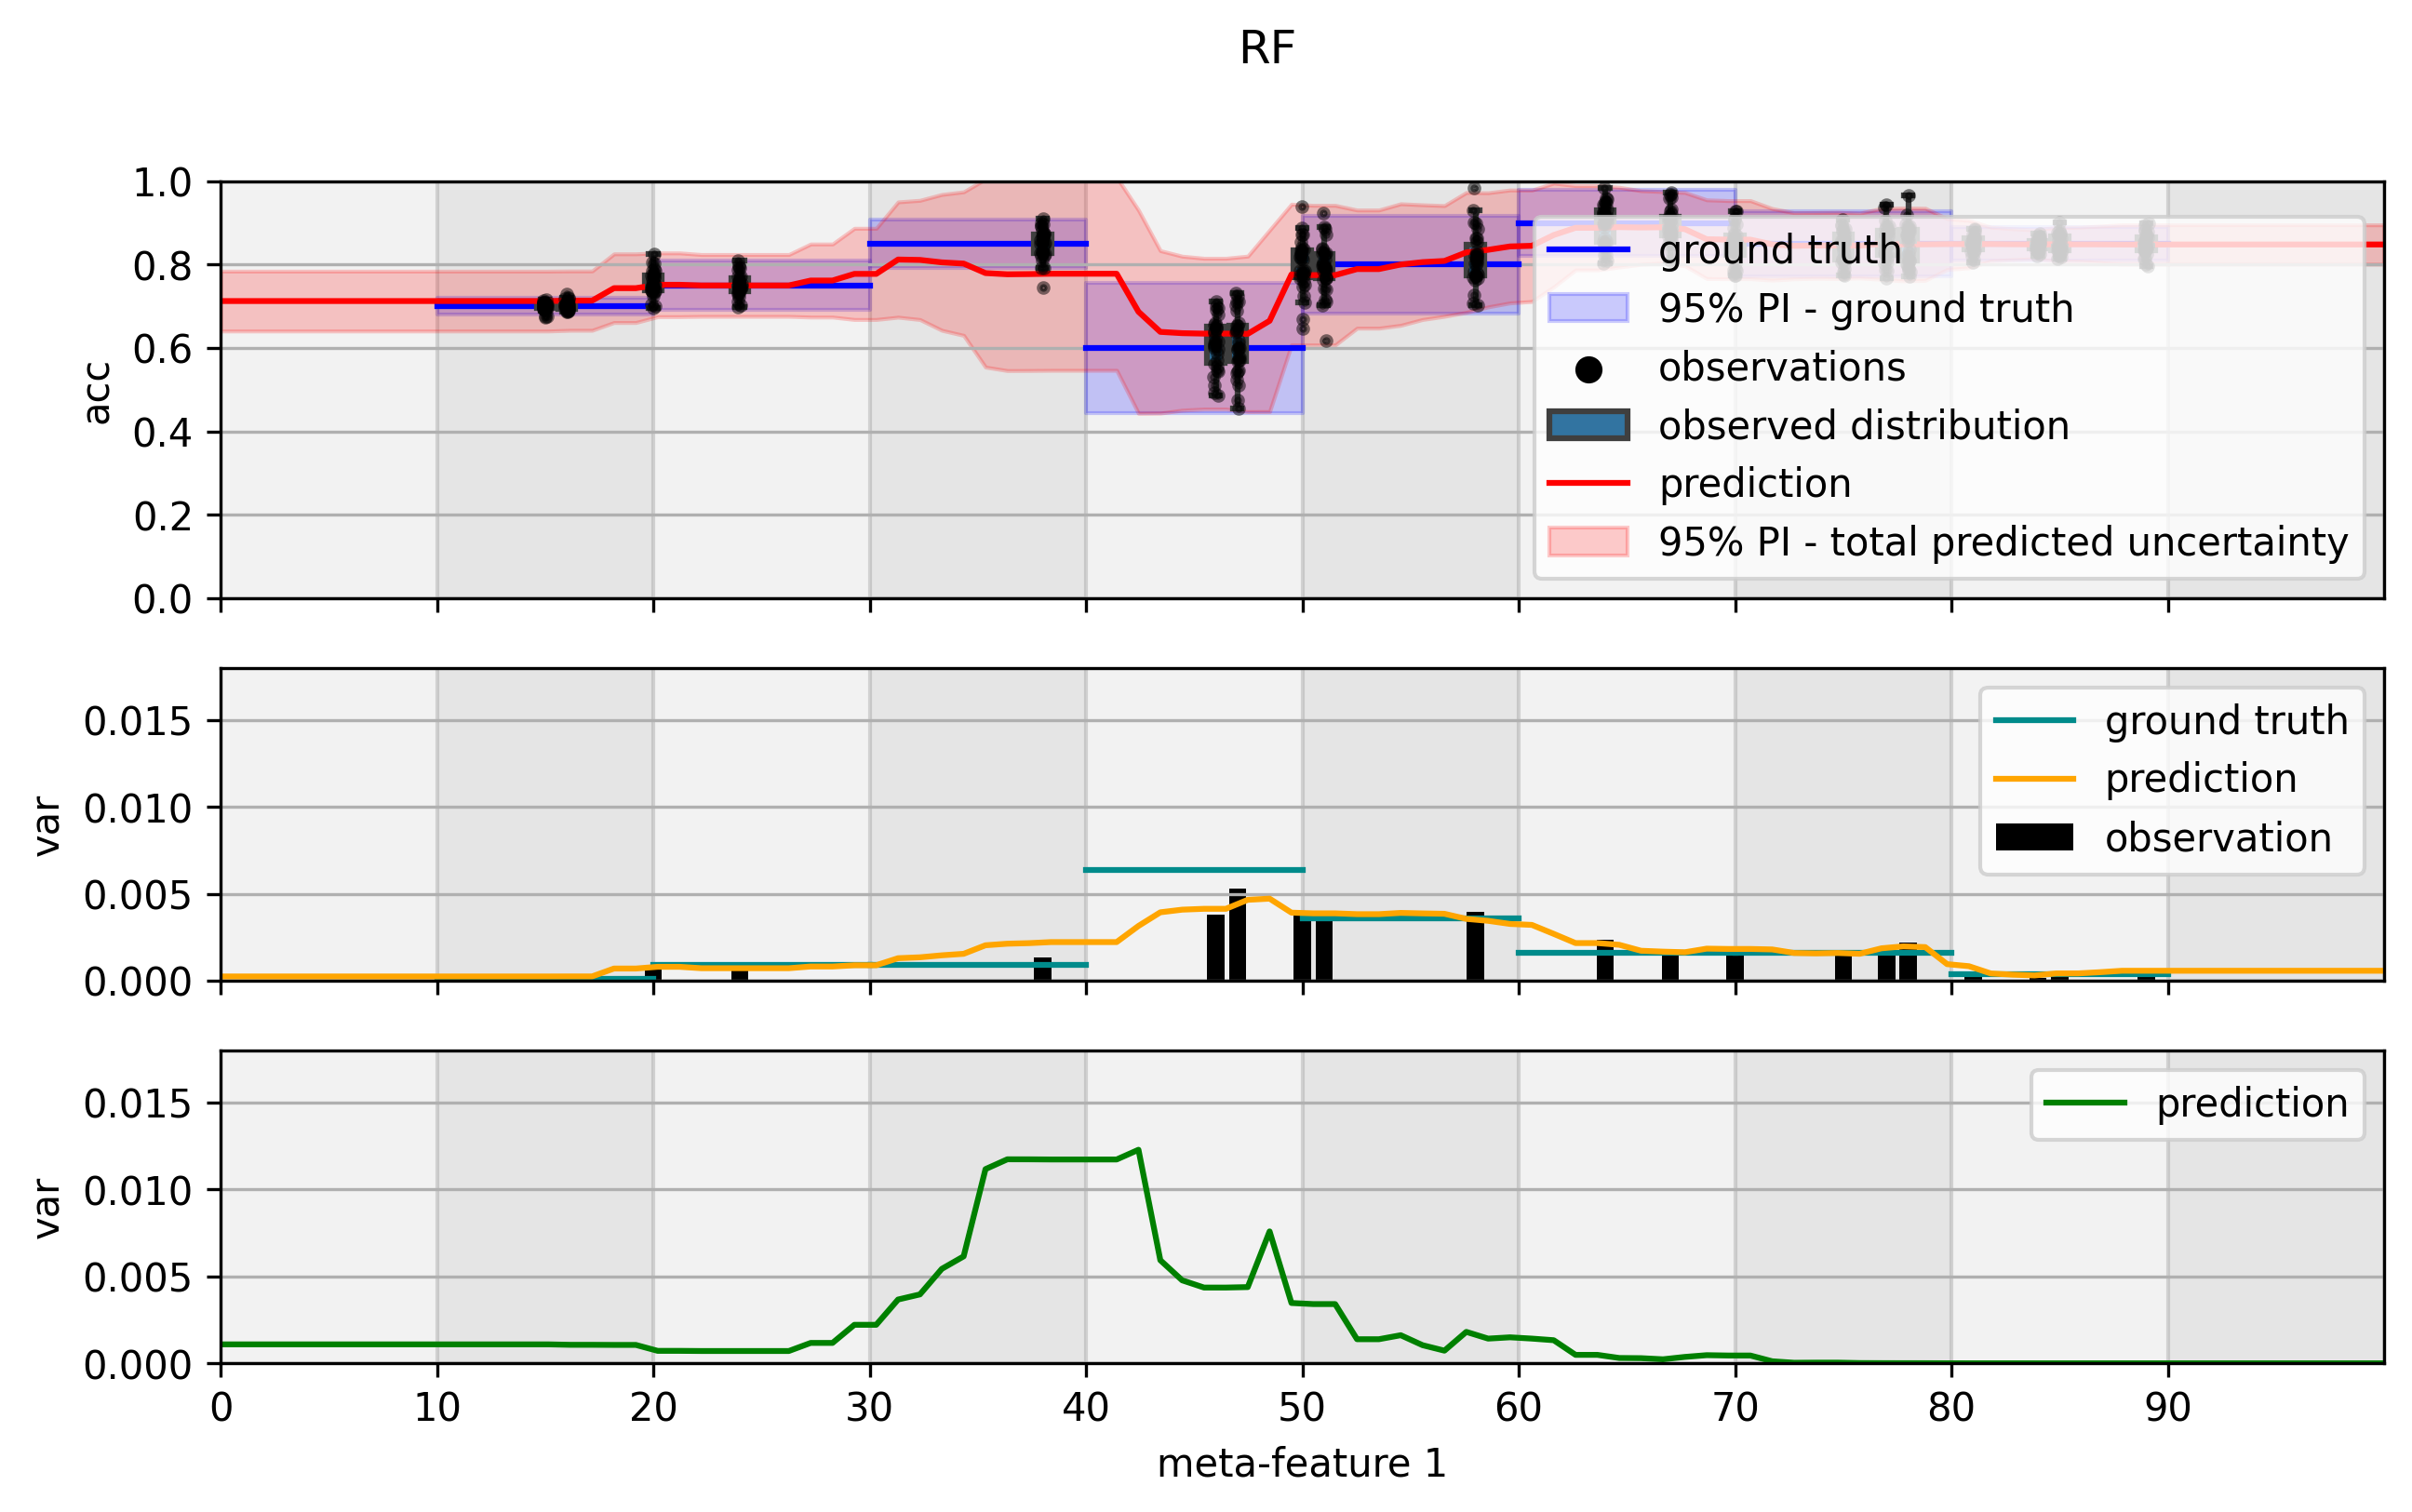

In [7]:
plot_data(x, y, x_agg, y_agg, x_test_qual, y_pred_mean_rf, aleatoric_uncertainty_rf, epistemic_uncertainty_rf, total_uncertainty_rf, title='RF')

## vSGLB

In [8]:
#model and training
cbr = CatBoostRegressor(loss_function='RMSEWithUncertainty', verbose=False,
                                        bootstrap_type='Bernoulli', custom_metric='RMSE',
                                        posterior_sampling=True, n_estimators=100, random_seed=0)
cbr.fit(x.reshape(-1,1), y)

#predictions to calculate uncertainties
pred_cbr_help = cbr.virtual_ensembles_predict(x_test_qual.reshape(-1,1), virtual_ensembles_count=10, prediction_type='TotalUncertainty')

#mean prediction
y_pred_mean_cbr = pred_cbr_help[:,0] 

#uncertainties
epistemic_uncertainty_cbr = pred_cbr_help[:,1]
aleatoric_uncertainty_cbr = pred_cbr_help[:,2]
total_uncertainty_cbr = epistemic_uncertainty_cbr + aleatoric_uncertainty_cbr

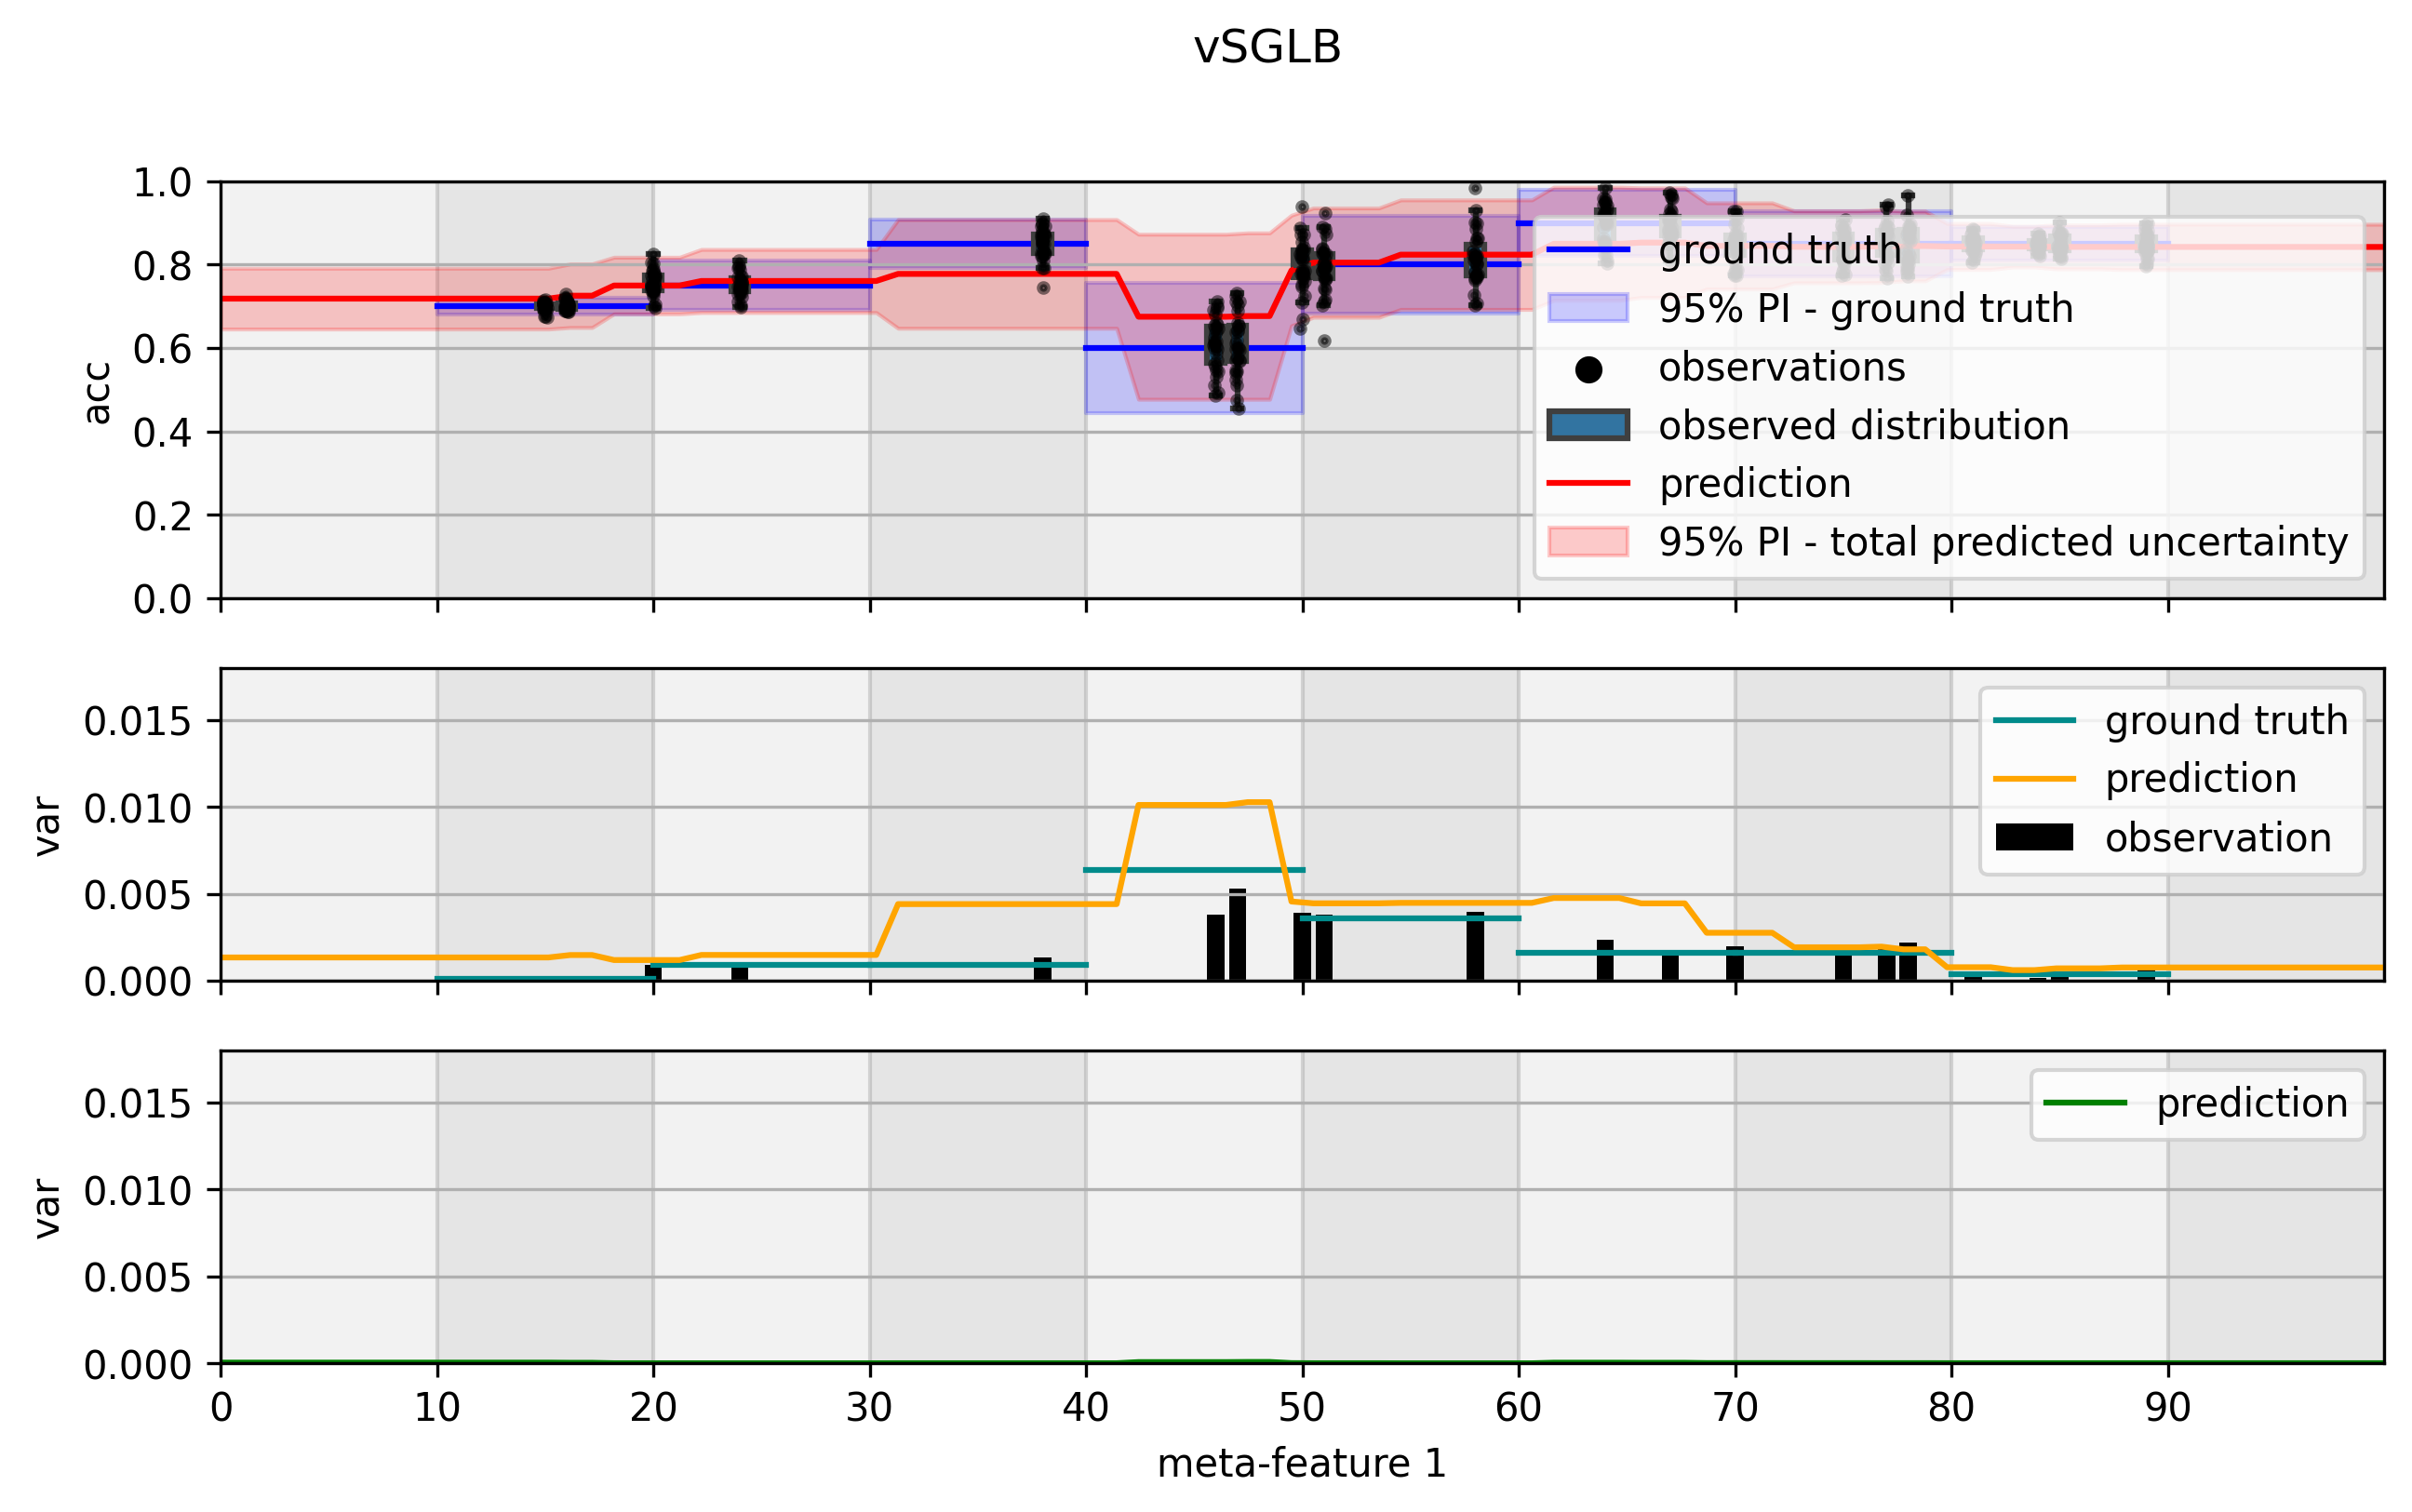

In [9]:
plot_data(x, y, x_agg, y_agg, x_test_qual, y_pred_mean_cbr, aleatoric_uncertainty_cbr, epistemic_uncertainty_cbr, total_uncertainty_cbr, title='vSGLB')

## GPR on aggregated mean and variance

In [10]:
#model and training
gpr_mean = GaussianProcessRegressor(Matern(), normalize_y=True, alpha=y_agg[:,1])
gpr_var = GaussianProcessRegressor()
gpr_mean.fit(x_agg.reshape(-1,1), y_agg[:,0])
gpr_var.fit(x_agg.reshape(-1,1), y_agg[:,1])

#predictions to calculate uncertainties
y_pred_mean_gpr, y_pred_epistemic_gpr = gpr_mean.predict(x_test_qual.reshape(-1,1), return_std=True)
y_pred_var_gpr = gpr_var.predict(x_test_qual.reshape(-1,1), return_std=False)

#mean prediction
y_pred_mean_gpr = y_pred_mean_gpr

#uncertainties
epistemic_uncertainty_gpr = y_pred_epistemic_gpr**2
aleatoric_uncertainty_gpr = y_pred_var_gpr
total_uncertainty_gpr = epistemic_uncertainty_gpr + aleatoric_uncertainty_gpr

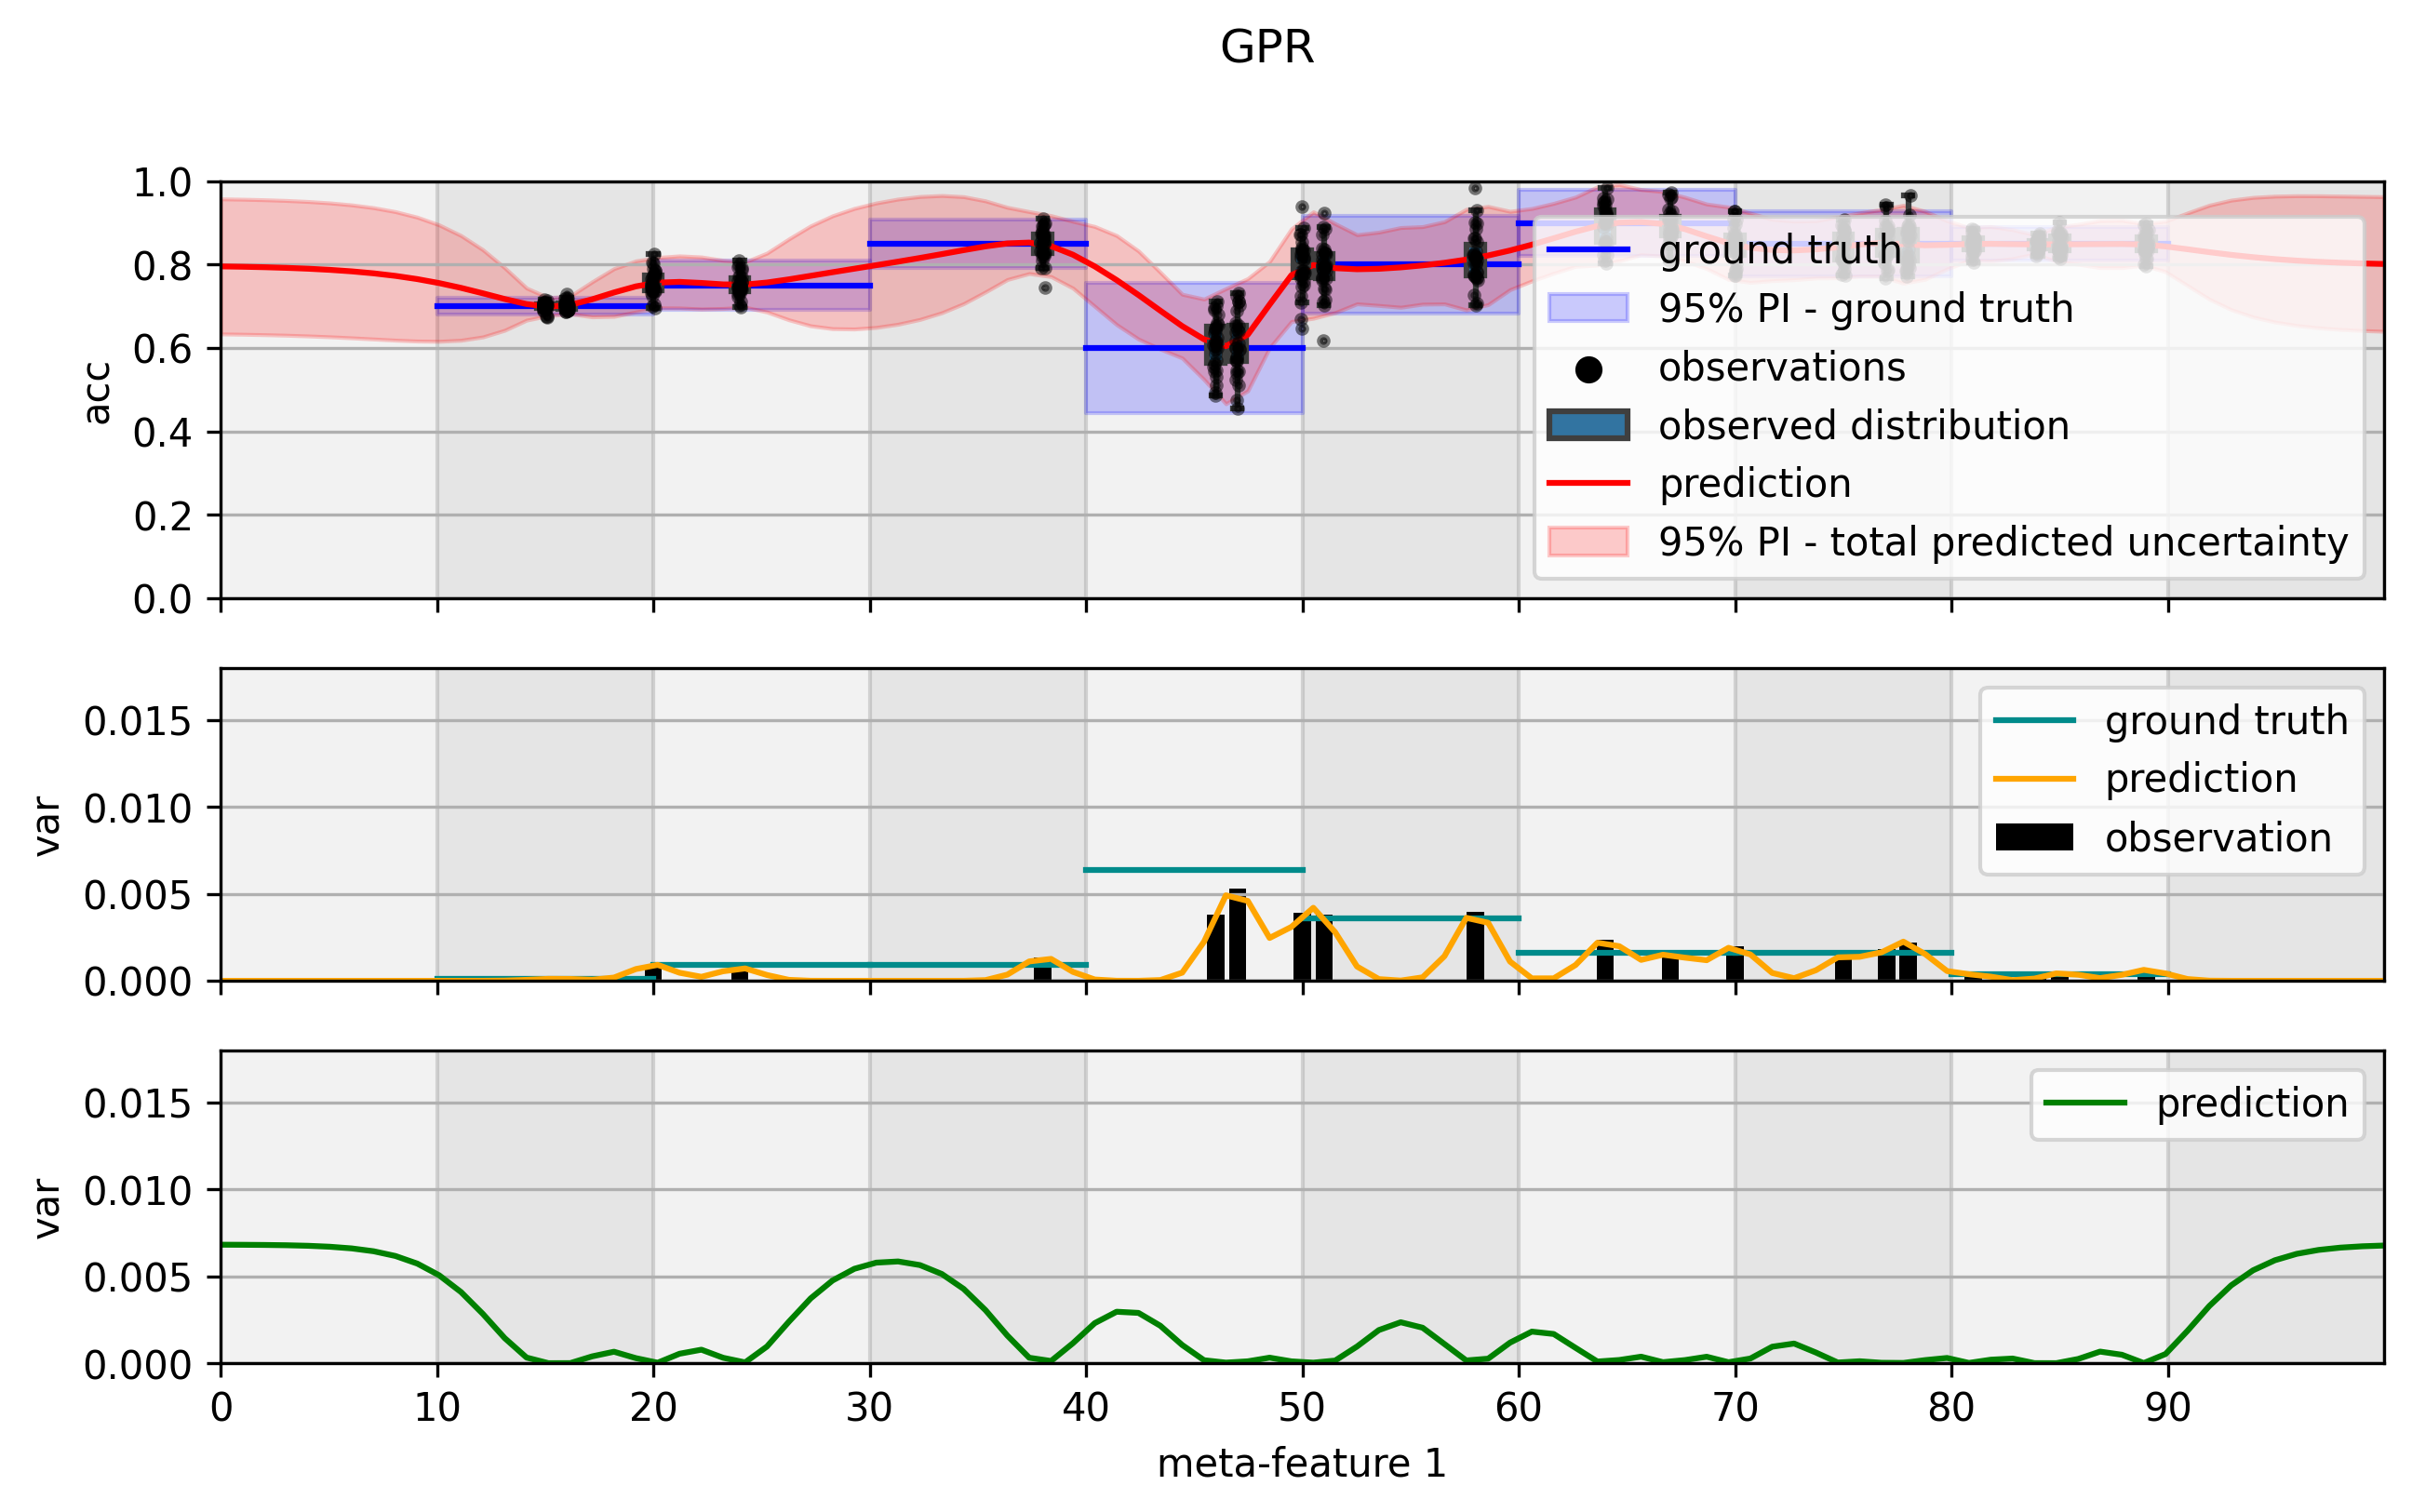

In [11]:
plot_data(x, y, x_agg, y_agg, x_test_qual, y_pred_mean_gpr, aleatoric_uncertainty_gpr, epistemic_uncertainty_gpr, total_uncertainty_gpr, title='GPR')

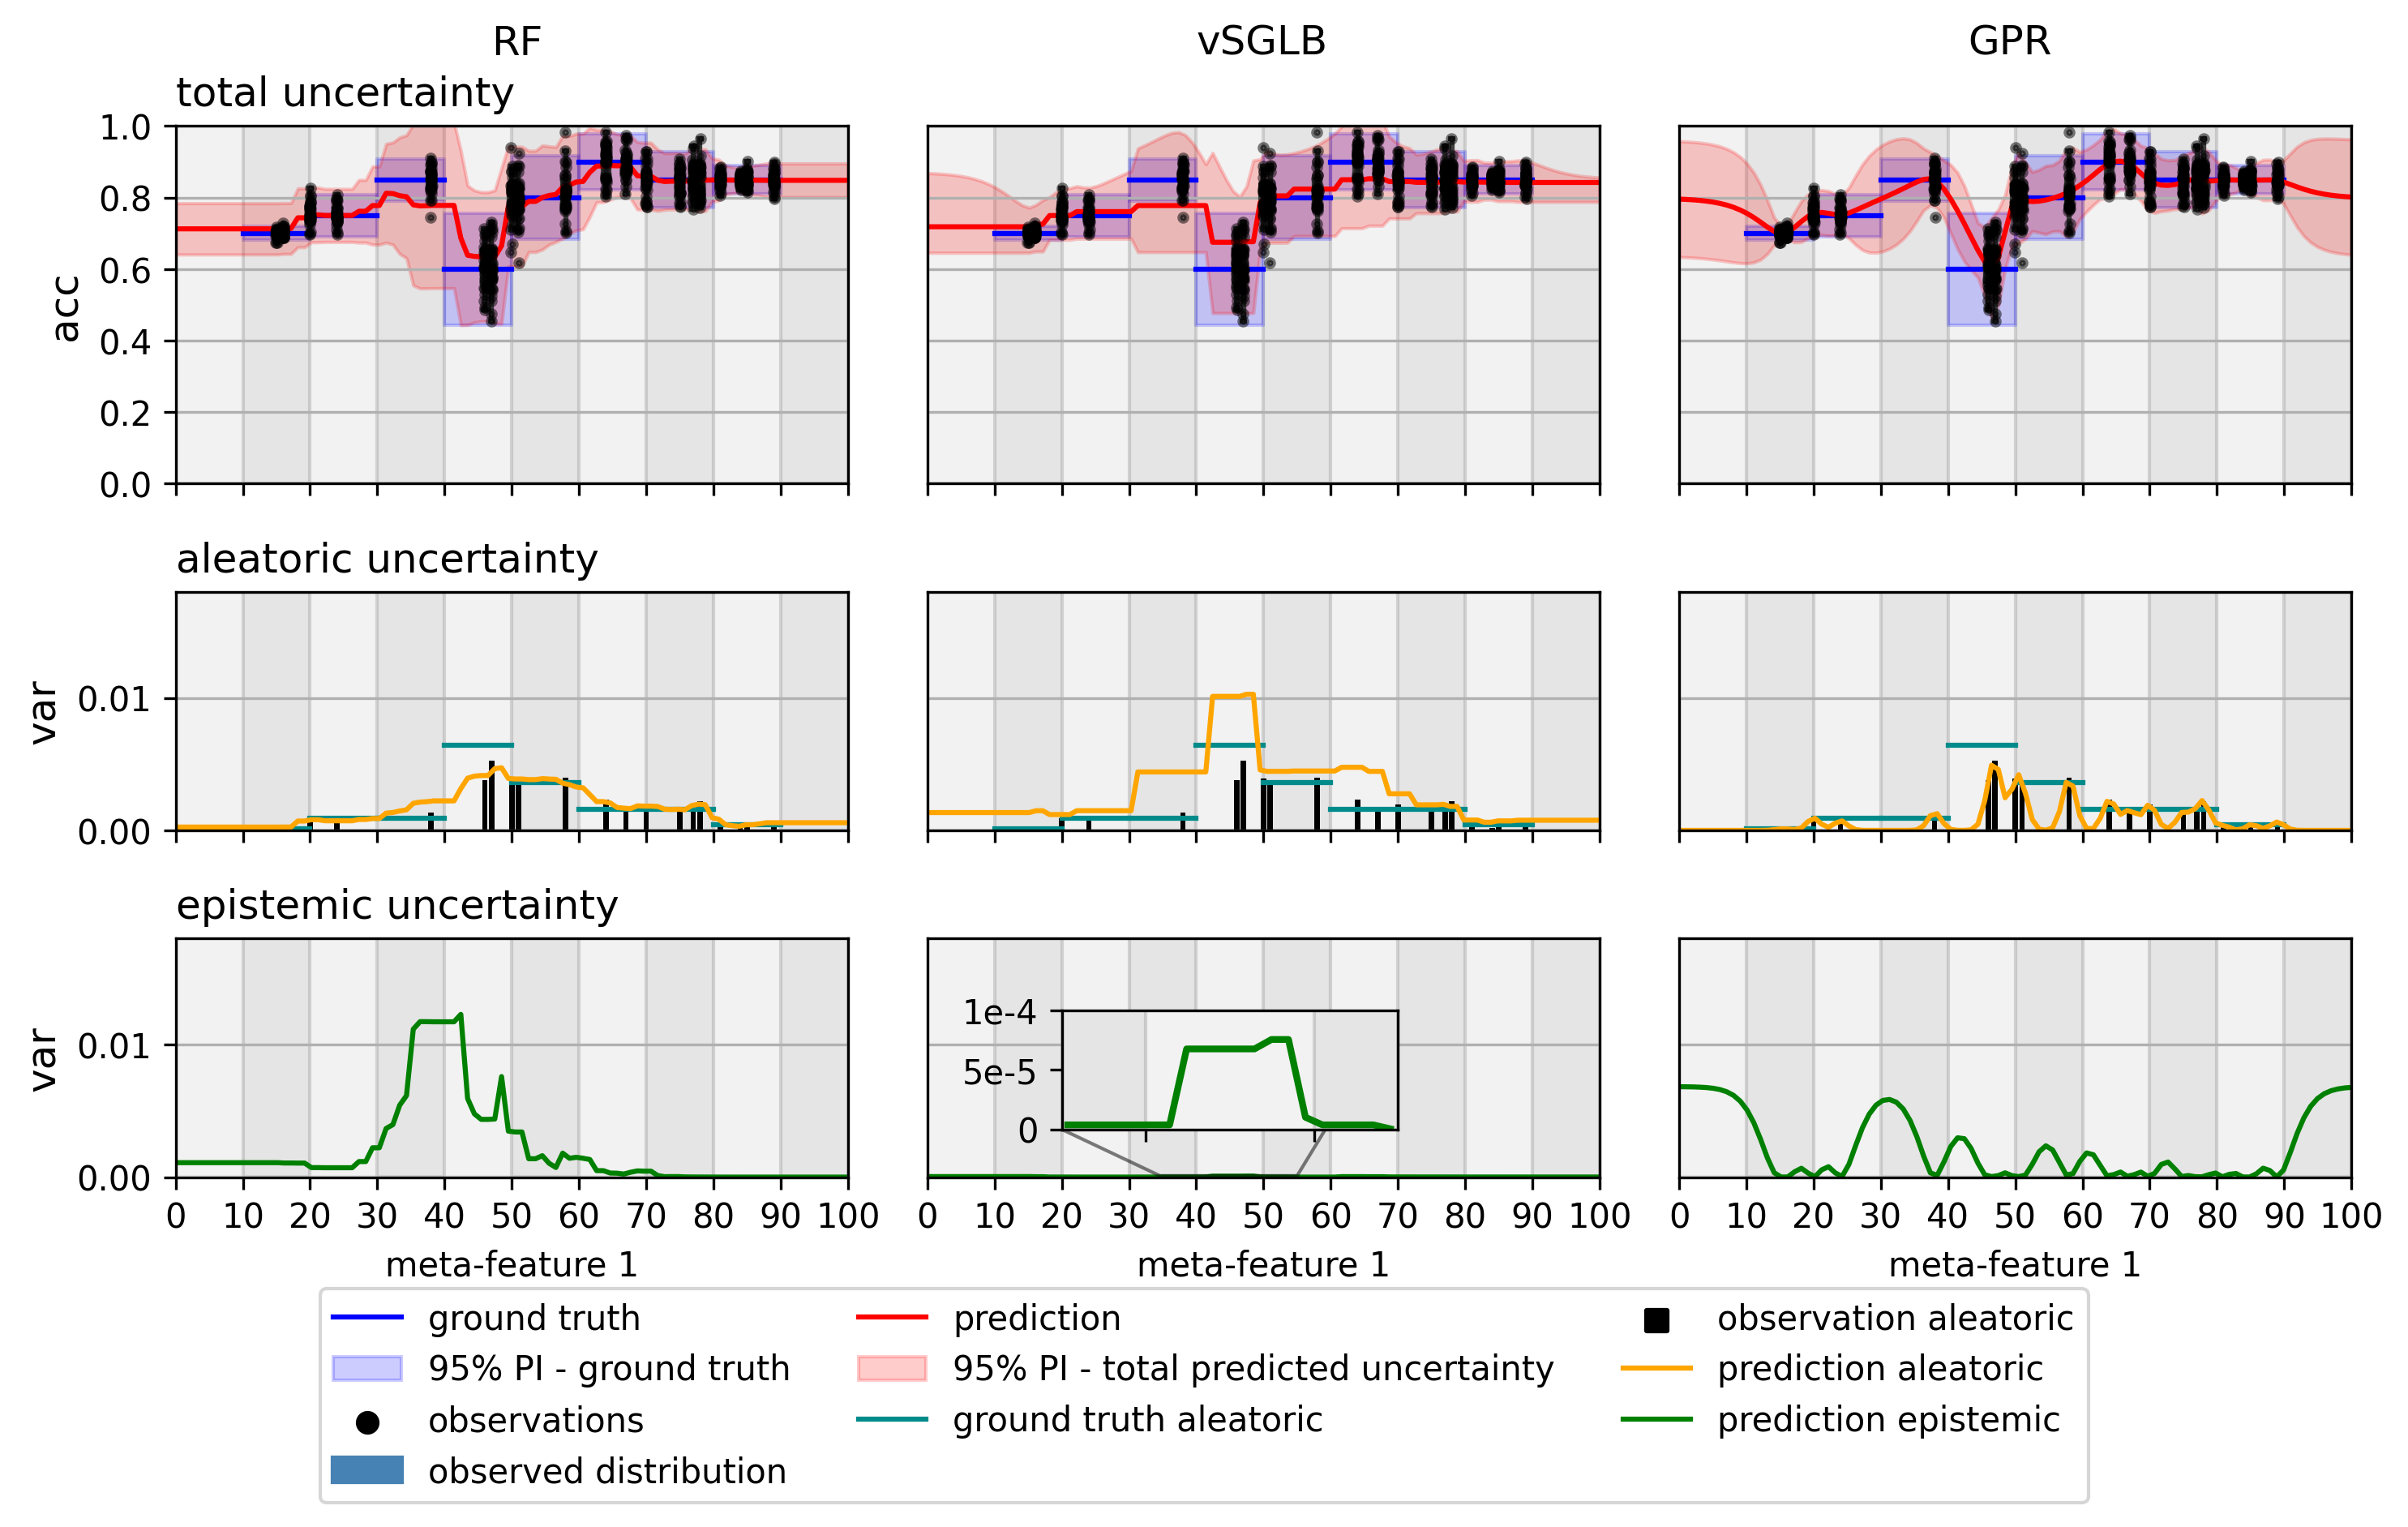

In [12]:
plot_all(x, y, x_agg, y_agg, x_test_qual,
         y_pred_mean_rf, aleatoric_uncertainty_rf, epistemic_uncertainty_rf, total_uncertainty_rf,
         y_pred_mean_cbr, aleatoric_uncertainty_cbr, epistemic_uncertainty_cbr, total_uncertainty_cbr, 
         y_pred_mean_gpr, aleatoric_uncertainty_gpr, epistemic_uncertainty_gpr, total_uncertainty_gpr)